In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Новый раздел

In [263]:
'''DATASET_TEST = './test.csv'''
DATASET_PATH = './train.csv'

df = pd.read_csv(DATASET_PATH, sep=',')
df.head() 

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [265]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [266]:
df.DistrictId=df.DistrictId.astype('object')
df.Id = df.Id.astype('object')

In [267]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [268]:
df = reduce_mem_usage(df)

Memory usage of dataframe is 1.53 MB
Memory usage after optimization is: 0.82 MB
Decreased by 46.0%


In [269]:
binary_to_numbers = {'A': 0, 'B': 1}
def binari(df_):
    df_['Ecology_2'] = df_['Ecology_2'].replace(binary_to_numbers, inplace=False)
    df_['Ecology_3'] = df_['Ecology_3'].replace(binary_to_numbers, inplace=False)
    df_['Shops_2'] = df_['Shops_2'].replace(binary_to_numbers, inplace=False)
    return df_

df = binari(df)  

In [270]:
df.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

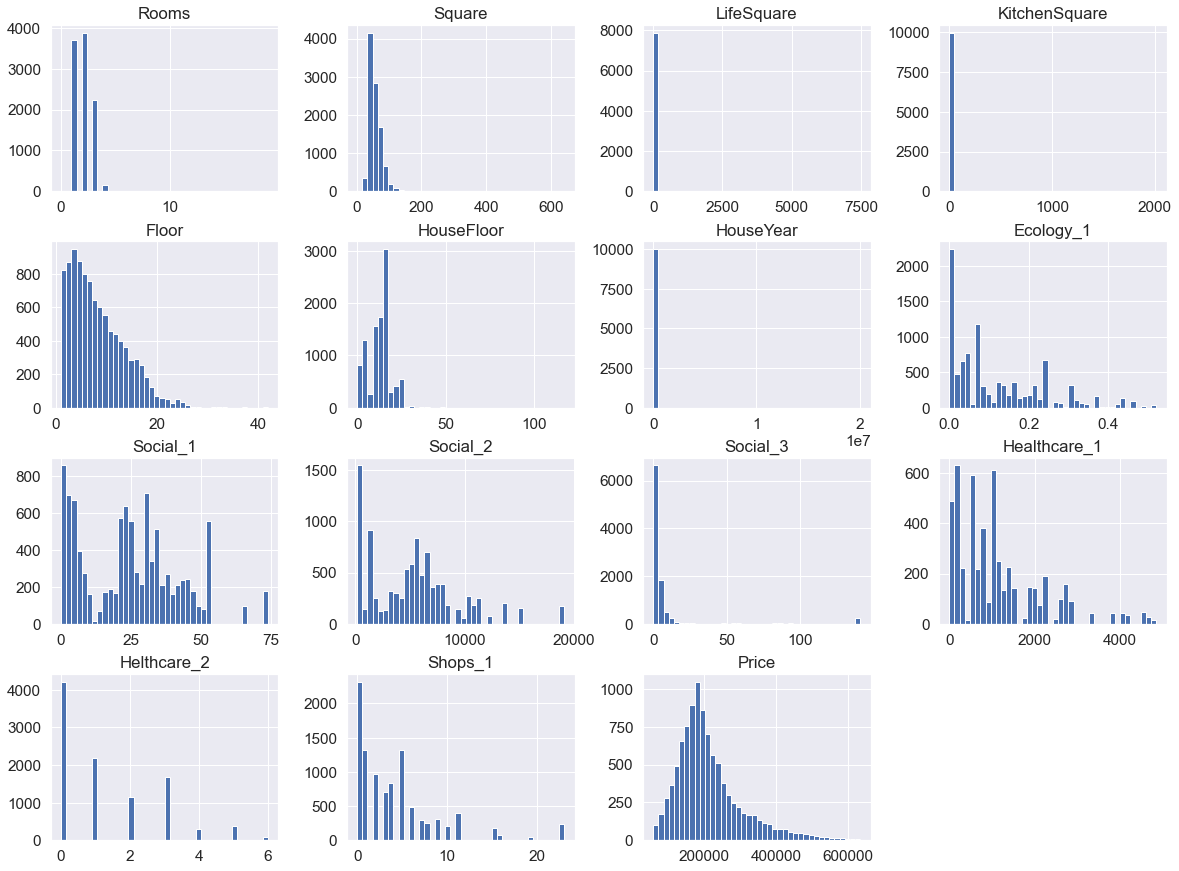

In [271]:
digital_features = df.select_dtypes(exclude =['object'])
digital_features.hist(figsize = (20,15), bins=40)
plt.show()

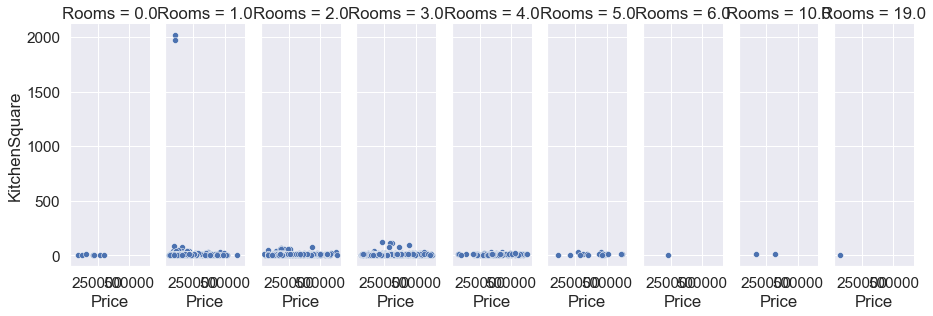

In [272]:
sns.relplot(x='Price',
            y='KitchenSquare',
            col='Rooms',
            data=df,
           height=4.5, aspect=0.32)

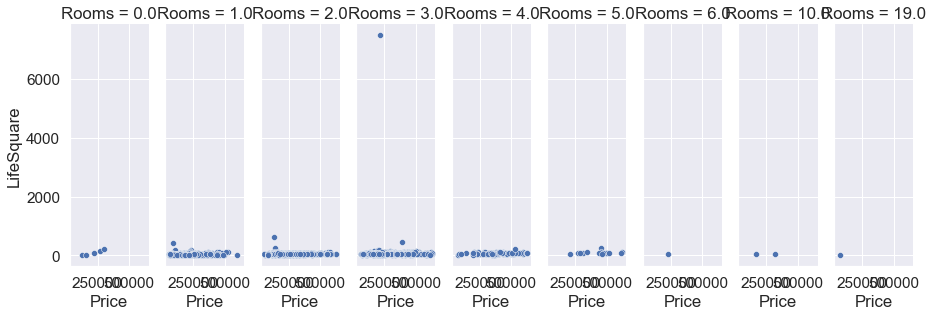

In [273]:
sns.relplot(x='Price',
            y='LifeSquare',
            col='Rooms',
            data=df,
           height=4.5, aspect=0.32)

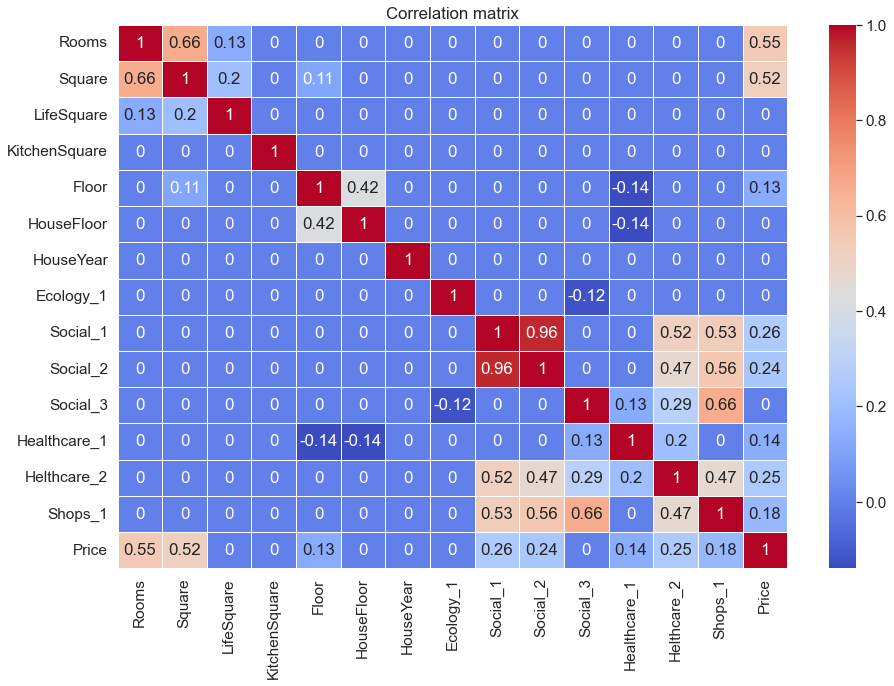

In [274]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.1] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

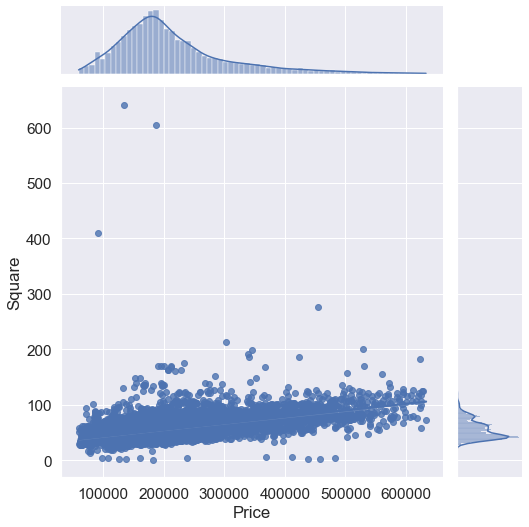

In [275]:
grid = sns.jointplot(df['Price'], df['Square'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

In [276]:
def preprocess_data(df_):
  df_.loc[df_['LifeSquare'].isna(), 'LifeSquare'] = df_['LifeSquare'].median()
  df_.loc[df_['Healthcare_1'].isna(), 'Healthcare_1'] = df_['Healthcare_1'].median()
  df_.loc[df_['KitchenSquare'] > 300, 'KitchenSquare'] = df_['KitchenSquare'].median()
  df_.loc[df_['LifeSquare'] > 1000, 'LifeSquare'] = df_['LifeSquare'].median()
  df_.loc[(df_.Square<=1.2), 'Square']= df_['Square']*10
  df_.loc[(df_.Square>400), 'Square']= df_['Square']/10

  return df_

df = preprocess_data(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             10000 non-null  category
 1   DistrictId     10000 non-null  category
 2   Rooms          10000 non-null  float32 
 3   Square         10000 non-null  float32 
 4   LifeSquare     10000 non-null  float32 
 5   KitchenSquare  10000 non-null  float32 
 6   Floor          10000 non-null  int8    
 7   HouseFloor     10000 non-null  float32 
 8   HouseYear      10000 non-null  int32   
 9   Ecology_1      10000 non-null  float32 
 10  Ecology_2      10000 non-null  category
 11  Ecology_3      10000 non-null  category
 12  Social_1       10000 non-null  int8    
 13  Social_2       10000 non-null  int16   
 14  Social_3       10000 non-null  int16   
 15  Healthcare_1   10000 non-null  float32 
 16  Helthcare_2    10000 non-null  int8    
 17  Shops_1        10000 non-null  i

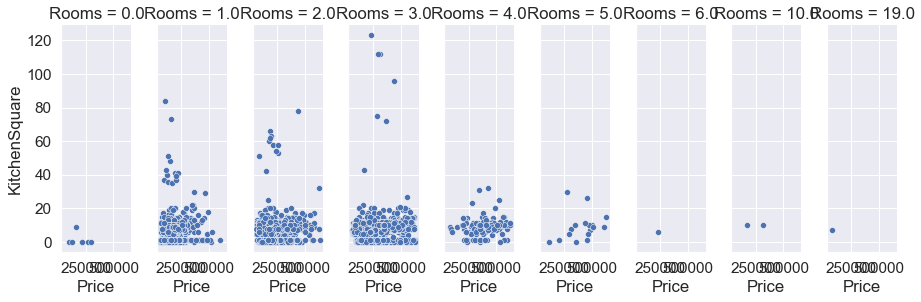

In [277]:
sns.relplot(x='Price',
            y='KitchenSquare',
            col='Rooms',
            data=df,
           height=4.5, aspect=0.32)

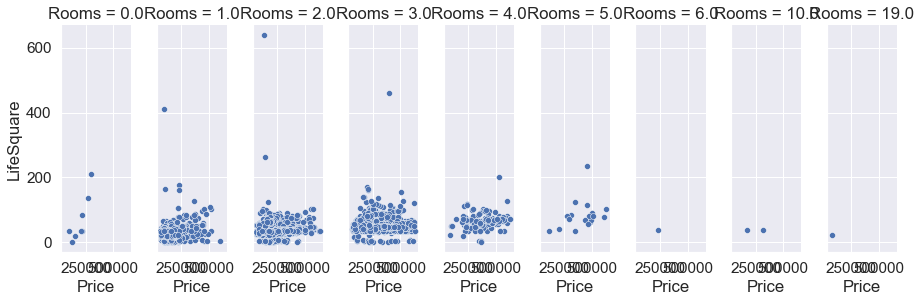

In [278]:
sns.relplot(x='Price',
            y='LifeSquare',
            col='Rooms',
            data=df,
           height=4.5, aspect=0.32)

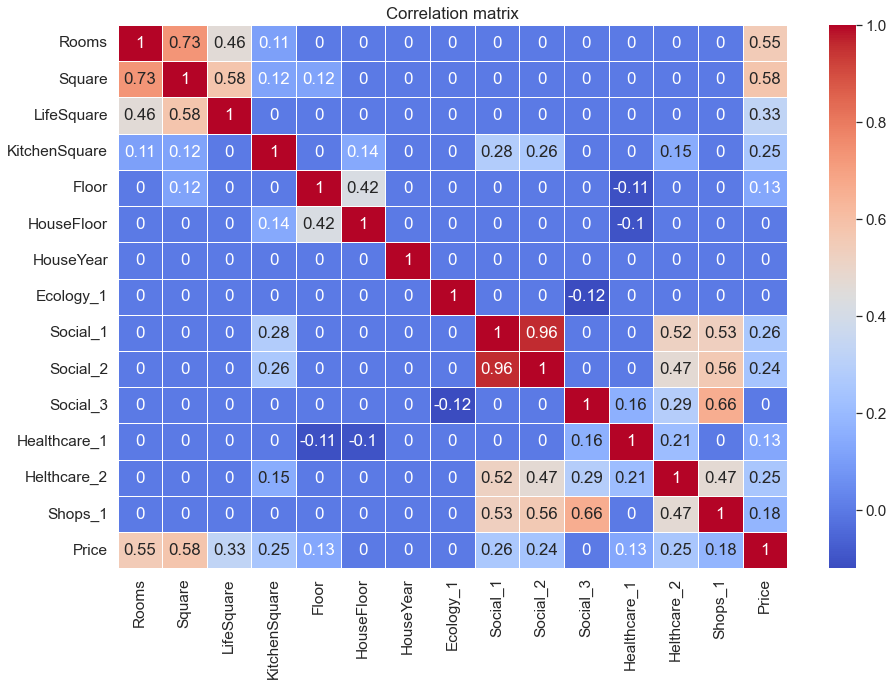

In [279]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.1] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [280]:
X = df.drop(labels=['Price'], axis=1)
df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.167774,35.521240,5.87610,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1026.358887,1.319500,4.231300,214139.218750
std,0.839523,19.147684,18.060480,5.17408,5.241148,6.776192,2.005003e+05,0.119026,17.532614,4006.799803,23.831875,746.645447,1.493601,4.806341,92872.304688
min,0.000000,1.988943,0.370619,0.00000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.777344
25%,1.000000,41.773050,25.527400,1.00000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,153872.628906
50%,2.000000,52.509274,32.781261,6.00000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.648438
75%,2.000000,65.889736,41.423129,9.00000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,249135.460938
max,19.000000,275.645294,638.163208,123.00000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.437500


In [281]:
y = df['Price'].values

In [282]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [283]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [284]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [285]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error


In [286]:
models_list = [LinearRegression, DecisionTreeRegressor, RandomForestRegressor, KNeighborsRegressor]

def get_r2_score(model):
    model_instance = model()
    model_instance.fit(X_train_scaled, y_train)
    y_pred_train = model_instance.predict(X_train_scaled)
    y_pred_valid = model_instance.predict(X_valid_scaled)
    score_train = r2_score(y_train, y_pred_train)
    score_valid = r2_score(y_valid, y_pred_valid)
    return score_train, score_valid
    
r2_scores = list(map(get_r2_score, models_list))

In [287]:
for model, scores in zip(models_list, r2_scores):
    print('{}:\n\ttrain: {}\n\tvalid: {}'.format(
        model.__name__,
        np.round(scores[0], 4),
        np.round(scores[1], 4)
    ))

LinearRegression:
	train: 0.5347
	valid: 0.5116
DecisionTreeRegressor:
	train: 1.0
	valid: 0.4206
RandomForestRegressor:
	train: 0.9617
	valid: 0.7124
KNeighborsRegressor:
	train: 0.7704
	valid: 0.6151


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++






In [288]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
rf_model = RandomForestRegressor(n_estimators=10,                              
                               oob_score=True,
                               random_state=1) 
rf_model.fit(X, y) # обучение 

# a = rf_model.predict(X2) # предсказание 

RandomForestRegressor(n_estimators=10, oob_score=True, random_state=1)

In [289]:
DATASET_TEST = './test.csv'
dft = pd.read_csv(DATASET_TEST, sep =',')

In [290]:
dft.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [291]:
dft.Id = dft.Id.astype('object')

In [292]:
dft.DistrictId=dft.DistrictId.astype('object')
dft = reduce_mem_usage(dft)

Memory usage of dataframe is 0.72 MB
Memory usage after optimization is: 0.39 MB
Decreased by 46.4%


In [293]:
dft = binari(dft)  

In [294]:
dft = preprocess_data(dft)

In [295]:
dft.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,5000.0,5000.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistrictId,5000.0,201.0,27.0,391.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rooms,5000.0,NaN,NaN,NaN,1.910000,0.838587,0.000000,1.000000,2.000000,2.000000,17.000000
Square,5000.0,NaN,NaN,NaN,56.449501,19.092793,1.378543,41.906230,52.921339,66.285130,223.453690
LifeSquare,5000.0,NaN,NaN,NaN,35.485134,15.915286,0.333490,25.850152,32.925087,41.769526,303.071106
KitchenSquare,5000.0,NaN,NaN,NaN,5.854000,4.854640,0.000000,1.000000,6.000000,9.000000,112.000000
Floor,5000.0,NaN,NaN,NaN,8.632000,5.483228,1.000000,4.000000,7.000000,12.000000,78.000000
HouseFloor,5000.0,NaN,NaN,NaN,12.601000,6.789167,0.000000,9.000000,12.000000,17.000000,99.000000
HouseYear,5000.0,NaN,NaN,NaN,1984.392600,18.573149,1908.000000,1973.000000,1977.000000,2000.000000,2020.000000
Ecology_1,5000.0,NaN,NaN,NaN,0.119874,0.120070,0.000000,0.019509,0.072158,0.195781,0.521867


In [296]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             5000 non-null   category
 1   DistrictId     5000 non-null   category
 2   Rooms          5000 non-null   float32 
 3   Square         5000 non-null   float32 
 4   LifeSquare     5000 non-null   float32 
 5   KitchenSquare  5000 non-null   float32 
 6   Floor          5000 non-null   int8    
 7   HouseFloor     5000 non-null   float32 
 8   HouseYear      5000 non-null   int16   
 9   Ecology_1      5000 non-null   float32 
 10  Ecology_2      5000 non-null   category
 11  Ecology_3      5000 non-null   category
 12  Social_1       5000 non-null   int8    
 13  Social_2       5000 non-null   int16   
 14  Social_3       5000 non-null   int16   
 15  Healthcare_1   5000 non-null   float32 
 16  Helthcare_2    5000 non-null   int8    
 17  Shops_1        5000 non-null   in

In [297]:
X2 = scaler.fit_transform(X)# где-то ошибка в размерности, нодо поискать, простая.
X2 = scaler.transform(dft)


In [304]:
yt = rf_model.predict(X2)

In [305]:
ytp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5000 non-null   float64
 1   Prise   5000 non-null   float64
dtypes: float64(2)
memory usage: 78.2 KB


In [306]:
ytp.describe(include = 'all')

,0,Prise
count,5000.000000,5000.000000
mean,81010.884401,81010.884401
std,24098.744459,24098.744459
min,63415.818359,63415.818359
25%,64657.157031,64657.157031
50%,64657.157031,64657.157031
75%,115420.766016,115420.766016
max,143461.962500,143461.962500


In [311]:
feature = dft['Id']
pd.DataFrame(feature)
feature.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: Id
Non-Null Count  Dtype   
--------------  -----   
5000 non-null   category
dtypes: category(1)
memory usage: 178.0 KB


In [326]:
df = pd.merge(feature, ytp['Prise'], right_index = True,
               left_index = True)
df

,Id,Prise
0,725,64657.157031
1,15856,64657.157031
2,5480,64910.633984
3,15664,64464.494922
4,14275,64657.157031
...,...,...
4995,8180,115663.329687
4996,4695,64910.633984
4997,5783,115420.766016
4998,4780,64657.157031


In [331]:
df.to_csv('SShirkin_predictions.csv', sep=',', index=False, encoding='utf-8')